K-means clustering

In [ ]:
pip install scikit-learn matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


In [ ]:
from sklearn.datasets import load_wine


In [ ]:
wine=load_wine()
wined=pd.DataFrame(wine.data,columns=wine.feature_names)
X=wine.data
wined.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
kmeans=KMeans(n_clusters=2,random_state=23)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=23)

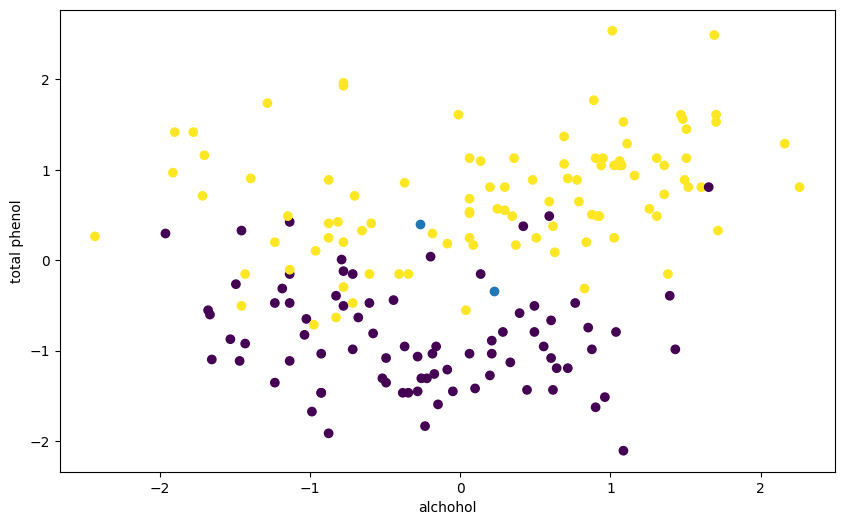

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0],X_scaled[:,5],c=kmeans.labels_,cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])

plt.xlabel("alchohol")
plt.ylabel("total phenol")
plt.show()

PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data=load_wine()
X=data.data
y=data.target

In [ ]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [ ]:
pca_df=pd.DataFrame(data=X_pca,columns=["PC1","PC2"])
pca_df['target']=y

In [ ]:
pca_df

,PC1,PC2,target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0
...,...,...,...
173,-3.370524,2.216289,2
174,-2.601956,1.757229,2
175,-2.677839,2.760899,2
176,-2.387017,2.297347,2


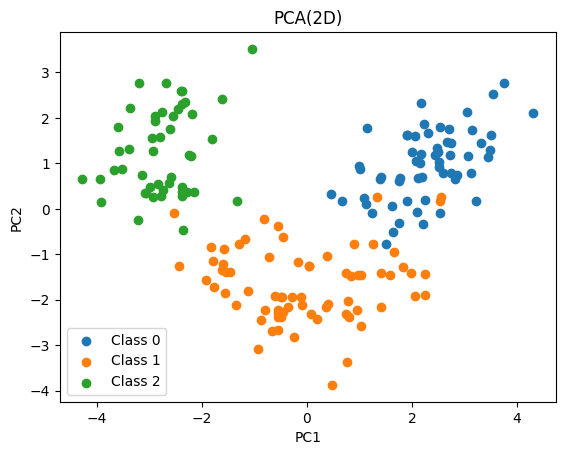

In [ ]:
for target in pca_df["target"].unique():
    subset = pca_df[pca_df["target"] == target]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Class {target}")
plt.title("PCA(2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()
